In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt


In [55]:
# read in the iris data
iris = load_iris()
X = iris.data
y = iris.target
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234565)

In [57]:
print(X_train, y_train)

[[4.8 3.  1.4 0.3]
 [6.3 3.3 6.  2.5]
 [4.6 3.2 1.4 0.2]
 [4.6 3.6 1.  0.2]
 [6.3 3.4 5.6 2.4]
 [6.5 3.  5.2 2. ]
 [7.2 3.2 6.  1.8]
 [5.  3.4 1.5 0.2]
 [7.6 3.  6.6 2.1]
 [6.2 3.4 5.4 2.3]
 [5.5 2.4 3.7 1. ]
 [6.4 2.8 5.6 2.1]
 [5.5 2.6 4.4 1.2]
 [7.7 2.6 6.9 2.3]
 [5.  2.3 3.3 1. ]
 [4.4 3.2 1.3 0.2]
 [6.3 2.7 4.9 1.8]
 [6.  3.4 4.5 1.6]
 [5.7 2.8 4.5 1.3]
 [5.7 3.  4.2 1.2]
 [5.1 2.5 3.  1.1]
 [5.4 3.4 1.5 0.4]
 [5.8 4.  1.2 0.2]
 [5.7 3.8 1.7 0.3]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 5.1 2.3]
 [6.7 3.3 5.7 2.1]
 [6.8 3.2 5.9 2.3]
 [6.9 3.2 5.7 2.3]
 [6.3 3.3 4.7 1.6]
 [6.5 2.8 4.6 1.5]
 [4.9 3.  1.4 0.2]
 [5.8 2.7 5.1 1.9]
 [6.5 3.  5.5 1.8]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [7.9 3.8 6.4 2. ]
 [5.8 2.7 4.1 1. ]
 [5.  3.4 1.6 0.4]
 [5.  3.2 1.2 0.2]
 [5.1 3.4 1.5 0.2]
 [7.3 2.9 6.3 1.8]
 [5.2 3.5 1.5 0.2]
 [6.2 2.2 4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.4 3.7 1.5 0.2]
 [6.2 2.8 4.8 1.8]
 [5.5 2.4 3.8 1.1]
 [6.7 3.1 4.7 1.5]
 [5.5 3.5 1.3 0.2]
 [6.6 2.9 4.6 1.3]
 [6.1 2.8 4.  1.3]
 [6.1 2.8 4.

In [63]:
params={    
    'booster':'gbtree',
    'objective': 'reg:gamma',
#     'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
    }

In [64]:
plst = params.items()


In [65]:
print(params)
print(plst)


{'booster': 'gbtree', 'objective': 'reg:gamma', 'gamma': 0.1, 'max_depth': 6, 'lambda': 2, 'subsample': 0.7, 'colsample_bytree': 0.7, 'min_child_weight': 3, 'silent': 1, 'eta': 0.1, 'seed': 1000, 'nthread': 4}
dict_items([('booster', 'gbtree'), ('objective', 'reg:gamma'), ('gamma', 0.1), ('max_depth', 6), ('lambda', 2), ('subsample', 0.7), ('colsample_bytree', 0.7), ('min_child_weight', 3), ('silent', 1), ('eta', 0.1), ('seed', 1000), ('nthread', 4)])


In [68]:

dtrain = xgb.DMatrix(X_train, y_train)


num_rounds = 500
#这里直接使用 params取代 plst也可以
model = xgb.train(plst, dtrain, num_rounds)



dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
print(ans)



[7.2423029e-36 3.1778073e+02 2.7606616e-34 9.4054712e+02 7.2745955e-34
 1.0076628e-02 8.2172041e+00 1.1210169e-35 5.2897322e-01 4.2869204e-01
 5.8551093e-38 2.3358977e+00 4.4504009e-34 3.1854602e-36 4.1296945e+02
 1.2326731e-33 1.0899130e+04 3.1854602e-36 3.1854602e-36 8.4187910e-38
 4.4577185e+02 5.3107486e+00 3.1854602e-36 2.7181752e-32 7.2423029e-36
 3.5252169e-02 2.0812883e+00 5.8603679e-28 1.5720452e+00 2.1525128e+00]


Accuracy: 0.0000 % 


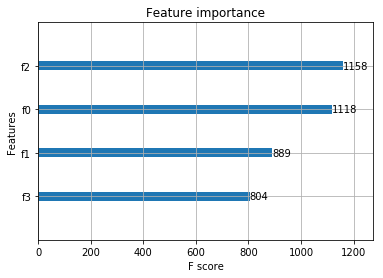

In [67]:
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1
print("Accuracy: %.4f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

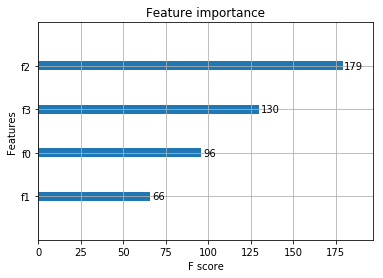